In [2]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

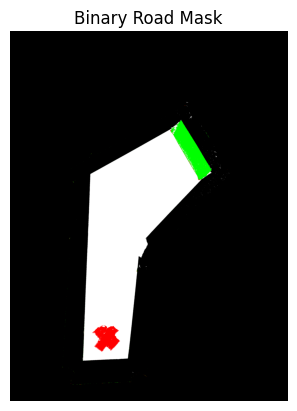

(4000, 3000, 3)


In [3]:
def transform_image(image : str) -> np.ndarray:

    im = Image.open(image)
    image = np.array(im)

    if image.shape[-1] != 3:
        arr = image[:, :, :3]

        
    blue_lower = np.array([0, 0, 50])
    blue_upper = np.array([100, 100, 255])
    red_lower = np.array([80, 0, 0])
    red_upper = np.array([255, 100, 100])
    green_lower = np.array([0, 50, 0])
    green_upper = np.array([80, 255, 80])
    road_mask = np.all((image >= blue_lower) & (image <= blue_upper), axis=-1).astype(np.uint8)
    red_mask = np.all((image >= red_lower) & (image <= red_upper), axis=-1).astype(np.uint8)
    green_mask = np.all((image >= green_lower) & (image <= green_upper), axis=-1).astype(np.uint8)

    flood_filled = road_mask.copy()

    h, w = flood_filled.shape
    exterior_point = (0, 0)

    exterior_mask = cv2.floodFill(flood_filled, None, exterior_point, 1)[1]
    
    interior_mask = 1 - exterior_mask
    final_mask = (interior_mask == 1).astype(np.uint8)
    rgb_matrix = np.zeros((*final_mask.shape, 3), dtype = np.uint8)
    rgb_matrix[final_mask == 1] = [255,255,255]
    rgb_matrix[green_mask == 1] = [0, 255, 0]
    rgb_matrix[red_mask == 1] = [255, 0, 0]
    return rgb_matrix[:4000,:3000]

binary_matrix = transform_image('image_test/real_test.jpg')

plt.imshow(binary_matrix, cmap='gray') 
plt.title('Binary Road Mask')
plt.axis('off')  
plt.show()

print(binary_matrix.shape)

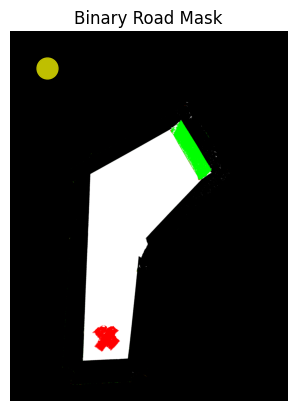

In [21]:
fig, ax = plt.subplots()
ax.imshow(binary_matrix, cmap='gray')
ax.plot(400,400, 'yo', markersize = 15)
plt.title('Binary Road Mask')
plt.axis('off')  
plt.show()